# **Classification Project - Hotel Booking Cancellation Prediction**

# **Marks: 30**

Welcome to the project on classification. We will use the **INN Hotels dataset** for this project.

--------------------------------
## **Context** 
-------------------------------

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include changes of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers' booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings potentially impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices at last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

----------------------------
## **Objective**
----------------------------- 

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting **which booking is likely to be canceled**. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You, as a data scientist, have to analyze the data provided to find which **factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.**


--------------------------
## **Data Description**
--------------------------

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: The unique identifier of each booking

* no_of_adults: The number of adults

* no_of_children: The number of children

* no_of_weekend_nights: The number of weekend nights (Saturday and Sunday) the guest stayed or booked to stay at the hotel

* no_of_week_nights: The number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel

* type_of_meal_plan: The type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)

* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

* room_type_reserved: The type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

* lead_time: The number of days between the date of booking and the arrival date

* arrival_year: The year of arrival date

* arrival_month: The month of arrival date

* arrival_date: The date of the month

* market_segment_type: Market segment designation.

* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

* no_of_previous_cancellations: The number of previous bookings that were canceled by the customer before the current booking

* no_of_previous_bookings_not_canceled: The number of previous bookings not canceled by the customer before the current booking

* avg_price_per_room: The average price per day for the reservation; prices of the rooms are dynamic. (in euros)

* no_of_special_requests: The total number of special requests made by the customer (e.g. high floor, view from the room, etc.)

* booking_status: Flag indicating if the booking was canceled or not.

## **Importing the necessary libraries and overview of the dataset**

In [50]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# To tune the model
from sklearn.model_selection import GridSearchCV

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

### **Loading the data**

In [51]:
hotel = pd.read_csv(r"C:\Users\rizaldy.t.nuque\OneDrive - Accenture\Documents\FY22\03-Continuous Learning\MIT\Great Learning\ADSP\Course Delivery\Week 4 - Machine Learning\Project\INNHotelsGroup.csv")

In [52]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

### **View the first and the last 5 rows of the dataset**

In [53]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [54]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### **Checking the info of the data**

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* The dataset has **36,275 rows and 19 columns**. 

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of **object type** while the rest of the columns are numeric in nature.

* There are **no null values** in the dataset.

* **Booking_ID column is an identifier**. Let's check if each entry of the column is unique.

In [56]:
data.Booking_ID.nunique()

36275

**Observations:**
- We can see that **all the entries of this column are unique**. Hence, this column would not add any value to our analysis. 
- Let's drop this column.

### **Dropping the Booking_ID column**

In [57]:
data = data.drop(["Booking_ID"], axis = 1)

In [58]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## **Exploratory Data Analysis and Data Preprocessing**

### **Summary Statistics for numerical columns**

### **Question 1: Write the observations from the below summary statistics (2 Marks)**

In [59]:
# Selecting numerical columns and checking the summary statistics
num_cols = data.select_dtypes('number').columns

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


**Observations:

• The average lead time (the number of days between the booking date and the arrival date) is 85 days. The minimum is 0, which means some bookings were made on the same day as the arrival at the hotel. And the maximum is 443 days, which is more than a year. But, 50% of the customers have a lead time of 57 days.

• Only 2.5% of bookings were made by repeated guests.

• The average price per room is 103 Euros. The minimum is 0 (maybe complimentary), and the peak is 540. And then, 50% of the customer booked their rooms at 99 Euros.

• 75% of the customers booked in October.

In [60]:
# Checking the rows where the avg_price_per_room is 0
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- In the market segment column, it looks like **many values are complementary**. Let's check the market segment where the room prices are equal to 0.

In [61]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

**Observations:**

* It makes sense that most values with room prices equal to 0 are the rooms given as a complimentary service by the hotel.
* The rooms booked online might be a part of some promotional campaign done by the hotel. We will not treat these rows as we don't have the data to test this claim.

### **Checking the distribution and outliers for numerical columns in the data**

lead_time
Skew : 1.29


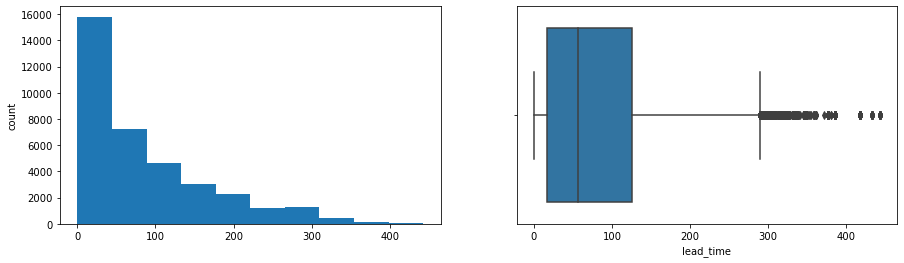

no_of_previous_cancellations
Skew : 25.2


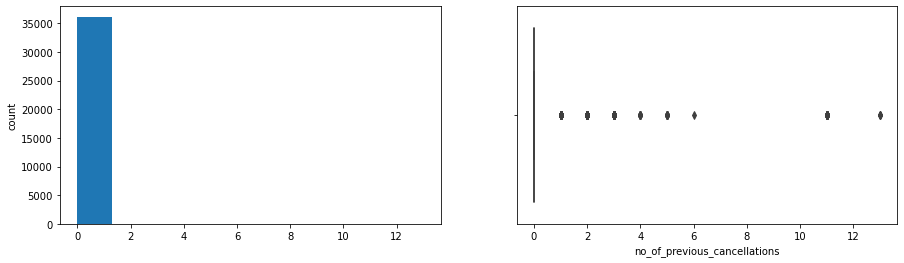

no_of_previous_bookings_not_canceled
Skew : 19.25


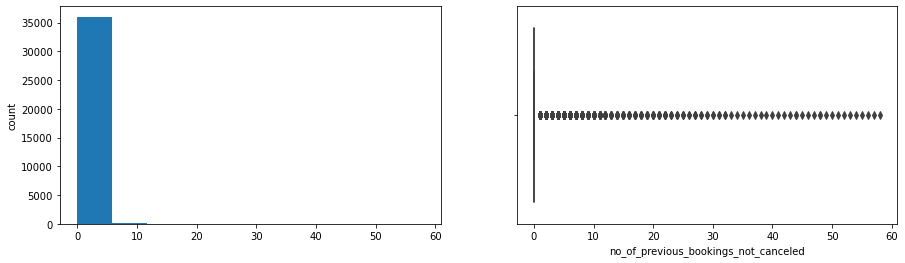

avg_price_per_room
Skew : 0.67


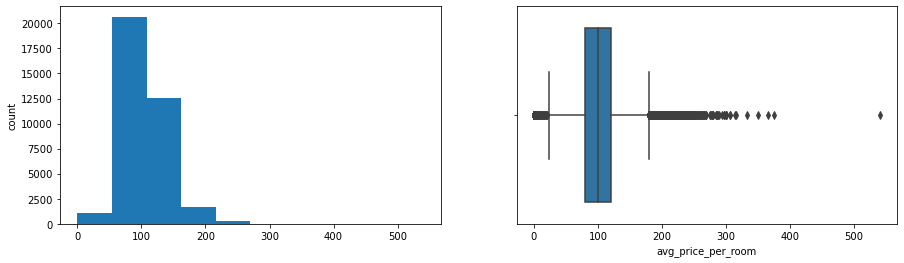

In [62]:
for col in ['lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']:
    print(col)
    
    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1,2,1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

- The distribution of **lead time is right-skewed** implies the majority of customer make bookings close to the arrival date. Many customers have made the booking on the same day of arrival as well. There are many outliers, **some customers made booking more than 400 days in advance**. 
- **Very few customers have more than one cancellation**. Some customers canceled more than 12 times.
- **Very few customers have more than 1 booking not canceled previously**. 
- **The distribution of average price per room is skewed to right**. The boxplot shows that there are outliers on both sides. The median price of a room is around ~100 euros. There is 1 observation where the average price of the room is more than 500 euros. This observation is quite far away from the rest of the values. We can treat this by clipping the value to the upper whisker (Q3 + 1.5 * IQR).

In [63]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [64]:
# Assigning the value of upper whisker to outliers
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

**Now, let's check the percentage of each category for categorical variables.**

### **Question 2:**

- **Write the code to check the percentage of each category for columns mentioned below (cat_cols) (2 Marks)**
- **Write your observations (2 Marks)**

In [65]:
cat_cols = ['no_of_adults', 'no_of_children', 'no_of_week_nights', 'no_of_weekend_nights', 'required_car_parking_space', 
        'type_of_meal_plan', 'room_type_reserved', 'arrival_month', 'market_segment_type', 'no_of_special_requests', 
        'booking_status']

# Write your code here
for i in cat_cols:
    print(data[i].value_counts(normalize = True))
    
    print('*' * 40)

2    0.719724
1    0.212130
3    0.063873
0    0.003832
4    0.000441
Name: no_of_adults, dtype: float64
****************************************
0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64
****************************************
2     0.315479
1     0.261558
3     0.216099
4     0.082426
0     0.065803
5     0.044493
6     0.005210
7     0.003115
10    0.001709
8     0.001709
9     0.000937
11    0.000469
15    0.000276
12    0.000248
14    0.000193
13    0.000138
17    0.000083
16    0.000055
Name: no_of_week_nights, dtype: float64
****************************************
0    0.465114
1    0.275534
2    0.250062
3    0.004218
4    0.003556
5    0.000937
6    0.000551
7    0.000028
Name: no_of_weekend_nights, dtype: float64
****************************************
0    0.969014
1    0.030986
Name: required_car_parking_space, dtype: float64
****************************************
Meal Plan 1     0.767

**Observations:

• Couples (adults = 2) are the most popular guest profile in the hotel. Surprisingly, there are some bookings without an adult registered in the stay.

• Around 92% of the bookings don't have accompanying children.

• The guests stayed for two nights, 31% of the time during weekdays.

• The guests stayed for zero nights, 46% of the time during weekends.

• Only 3% of the customers require a parking space.

• As expected, breakfast (Meal Plan 1) is the most popular meal-type booked by the guests at 76%, and this could be attributed to complimentary breakfast.

• The guests booked Room Type 1 77% of the time.

• October is the most patronized, aligned to an earlier observation. August, September, and October account for almost 38% of the arrival date in the hotel.

• About 63% of the guests use online to make their hotel bookings.

• Approximately 54% of the time, customers are not requesting any special accommodations.

• There's about a 32% cancelation rate in the customers' booking.

### **Replacing values 9 and 10 for the number of children with 3 and encoding the target variable**

In [66]:
# Replacing values 9 and 10 with 3 for the column no_of_children
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

In [67]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Let's check the relationship of market segment type with the average price per room.

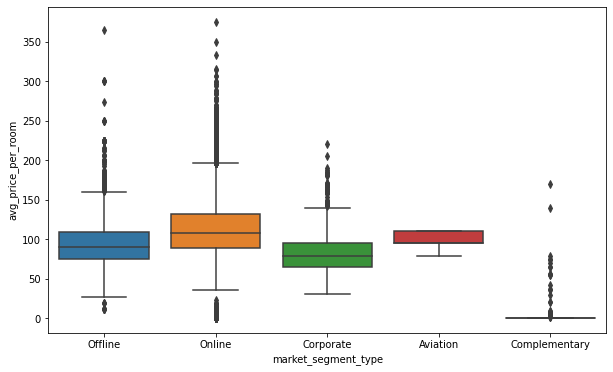

In [68]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "market_segment_type", y = "avg_price_per_room")

plt.show()

**Observations:**

* **Rooms booked online have the highest variations in prices.**
* The distribution for offline and corporate room prices are almost similar except for some outliers.
* Complementary market segment gets the rooms at very low prices, which makes sense.

**Let's see how booking status varies across different market segments. Also, how lead time impacts booking status.**

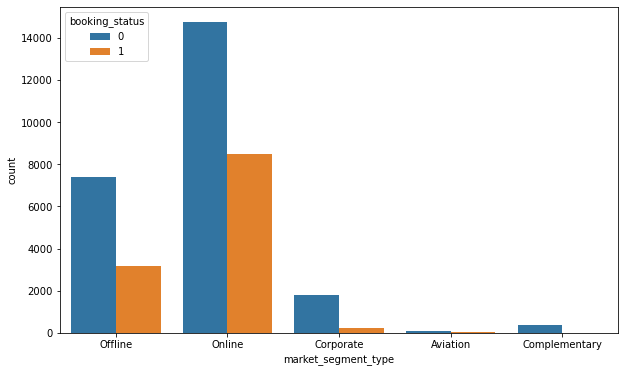

In [69]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'market_segment_type', hue = 'booking_status', data = data)

plt.show()

**Observations:**

* **Online bookings have the highest number of cancellations.**
* Bookings made offline are less prone to cancellations.
* Corporate and complementary segment also show very low number of cancellations.

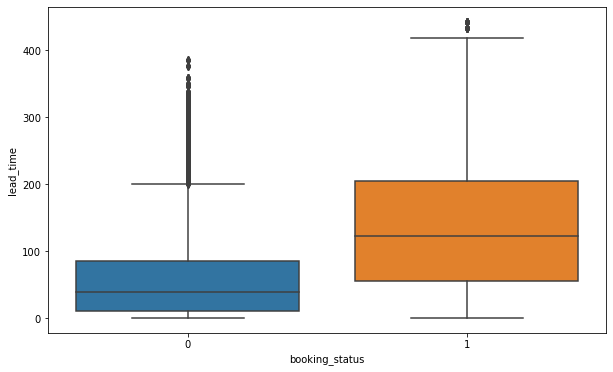

In [70]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "booking_status", y = "lead_time")

plt.show()

**Observations:**

* There's a big difference in the median value of lead time for bookings that were canceled and bookings that were not canceled. 
- **The higher the lead time, the higher are the chances of a booking being canceled.**

**Now, let's check how the arrival month impacts the booking status.**

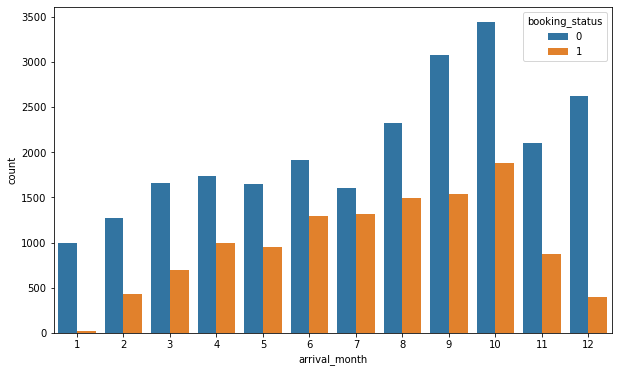

In [71]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'arrival_month', hue = 'booking_status', data = data)

plt.show()

**Observations:**

- We observed earlier that the month of October has the highest number of bookings but the above plot shows that **October has the highest number of cancellations** as well.
- Bookings made for **December and January are least prone to cancellations**.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

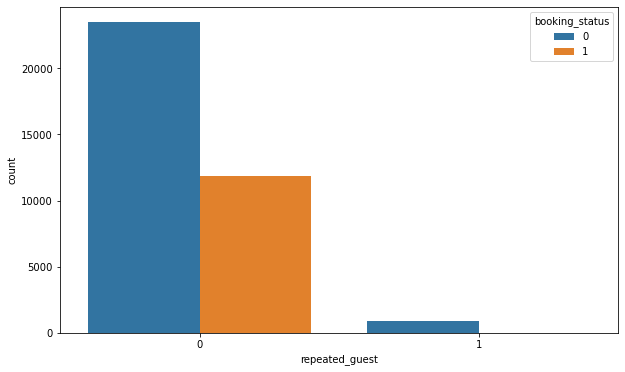

In [72]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'repeated_guest', hue = 'booking_status', data = data)

plt.show()

**Observations:**

* There are **very few repeat customers but the cancellation among them is very less**. 
* This is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.

**We have explored different combinations of variables. Now, let's see the pairwise correlations between all the variables.**

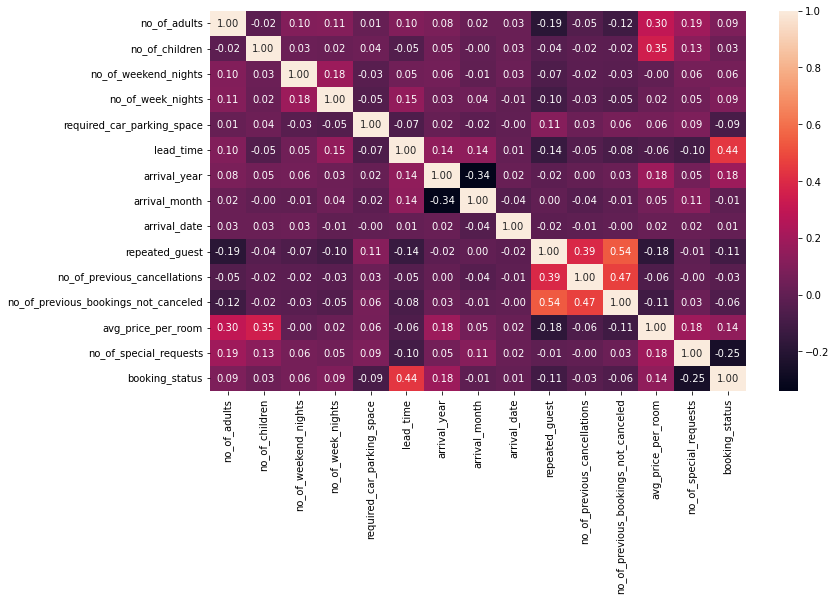

In [73]:
plt.figure(figsize = (12, 7))

sns.heatmap(data.corr(), annot = True, fmt = ".2f")

plt.show()

**Observations:**

* There's a **weak positive correlation between the number of customers (adults and children) and the average price per room**. This makes sense as more the number of customers more the price of the rooms.
* There's a **weak negative correlation between average room price and repeated guests**. The hotel might be giving some loyalty benefits to the customers.
* **Repeated guests have a positive correlation with the number of previous bookings canceled and previous bookings not canceled.** This implies that repeated customers are also likely to cancel their bookings.  
* There's a weak positive correlation between lead time and the number of weeknights a customer is planning to stay in the hotel.
* There's a **positive correlation between booking status and lead time**, indicating higher the lead time higher are the chances of cancellation.
* There's a weak negative correlation between the number of special requests from the customer and the booking status, indicating **if a customer has made some special requests the chances of cancellation might decrease**.

**Now that we have explored our data, let's prepare it for modeling.**

## **Preparing the data for modeling**

- Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
- We will then split the data into train and test sets.

### **Question 3:**

- **Drop the target variable from the original data and store it in a separate DataFrame `X` (1 Mark)**
- **Store the target variable in a separate series `Y` (1 Mark)**

In [74]:
# Remove the blanks and complete the below code
X = data.drop(['booking_status'], axis = 1)
Y = data['booking_status']

In [75]:
# Creating dummy variables, drop_first = True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## **Building Classification Models**

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer cancels their booking.
2. Predicting a customer will cancel their booking but in reality, the customer does not cancel their booking. 

**Which case is more important?** 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled, then the hotel will lose resources and will have to bear additional costs of unsold rooms. The hotel might also have to bear an additional cost of advertising the room again on different distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled, then the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.


**How to reduce the losses?**

* Hotel would want `F1 Score` to be maximized, greater the F1 score, higher are the chances of minimizing False Negatives and False Positives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [77]:
# Function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Canceled', 'Canceled'], yticklabels = ['Not Canceled', 'Canceled'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

### **Logistic Regression**

### **Question 4: Fit the logistic regression model on the train dataset using random_state = 1 (2 Marks)**

In [78]:
# Define Logistic Regression model 
log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_train,y_train)

LogisticRegression()

**Let's check the coefficient of each dependent variable in the data**.

### **Question 5: Write your observations on the below coefficients obtained from the logistic regression model (3 Marks)**

**Note:** There might be slight variation in the coefficients depending on the library version you are using. There will be no deducting in marks for that as long as your observations are aligned with the output. In case, the coefficients vary too much, please make sure your code is correct.

In [79]:
pd.Series(log_reg.coef_[0], index = X_train.columns).sort_values(ascending = False)

market_segment_type_Online              0.623273
type_of_meal_plan_Not Selected          0.321190
no_of_weekend_nights                    0.180888
avg_price_per_room                      0.019750
lead_time                               0.015394
no_of_adults                            0.011349
no_of_week_nights                       0.006807
arrival_date                            0.001291
type_of_meal_plan_Meal Plan 3           0.000400
room_type_reserved_Room_Type 3          0.000341
arrival_year                           -0.001733
room_type_reserved_Room_Type 2         -0.004280
market_segment_type_Complementary      -0.008772
room_type_reserved_Room_Type 5         -0.011115
room_type_reserved_Room_Type 7         -0.017796
no_of_previous_cancellations           -0.024654
market_segment_type_Corporate          -0.031241
room_type_reserved_Room_Type 4         -0.032696
repeated_guest                         -0.043363
room_type_reserved_Room_Type 6         -0.045539
no_of_children      

**Observations:

Features that affect the booking cancellation positively

• market_segment_type_Online

• type_of_meal_plan_Not Selected

• no_of_weekend_nights

• avg_price_per_room

• lead_time

• no_of_week_nights

• no_of_adults

• arrival_date

• type_of_meal_plan_Meal Plan 3

• room_type_reserved_Room_Type 3

Features that affect the booking cancellation negatively

• arrival_year
• room_type_reserved_Room_Type 2
• market_segment_type_Complementary
• room_type_reserved_Room_Type 5
• room_type_reserved_Room_Type 7
• no_of_previous_cancellations
• market_segment_type_Corporate
• room_type_reserved_Room_Type 4
• repeated_guest
• room_type_reserved_Room_Type 6
• no_of_children
• arrival_month
• type_of_meal_plan_Meal Plan 2

• Based on the Logistic Regression model, market_segment_type_Online is an essential feature in predicting whether a customer would cancel the booking or not.

• This model also suggests that booking cancellation is dependent on the type of meal plan. Guests who did not select any meal plan were shown to have a higher cancellation rate. In addition, a segment of customers who opted for meal plan type 3 (full board – breakfast, lunch, and dinner) are more likely to cancel their bookings.

•	No_of_weekend_nights is another critical variable in predicting the cancellation rate. Customers who reserve more days during weekends tend to cancel their bookings. This is expected since the price is dependent on the number of days and typically higher during weekends. Similarly, guests who booked more no_of_week_nights are more likely to have cancellations. 

•	The average price per room of the hotel appears to impact the likelihood of cancellation. The higher the price, the higher the chance the customer will cancel. This suggests that customers who are "shopping around prices" for cheaper options may decide to cancel when they find a less expensive hotel. This notion of shopping around prices is possible because of the high lead time in our data set. This observation confirms our earlier observation of the correlation between booking status and lead time, indicating that the higher the lead time, the higher the chances of cancellation.

• We've seen earlier that couples are the most popular guest profile in the hotel. Therefore, hotels can make campaigns related to this customer group.

• Other features which appear to affect the chances of booking cancellation are arrival date and room_type_reserved_Room_Type 3. We know the most demanding months are between August to October.

• The model also captures the inverse relationship between booking cancellation and most reserved room types. This suggests that we can minimize cancellations if the customers meet or exceed expectations around the room types. 

• Customers with prior experience with the hotel are also less likely to cancel.

• Bookings during the busiest months of the hotel (i.e., August to October) are also less likely to be canceled, probably because there are known holidays or breaks during these periods.

• Customers who used the offline market_segment_type are less likely to cancel. This might be due to the hassle of doing it offline versus online.

• Finally, guests who meet or exceed their special requests will most likely not cancel their reservations.


### **Question 6: Write your interpretations of the odds calculated from the logistic regression model coefficients (3 Marks)**

In [80]:
# Finding the odds
odds = np.exp(log_reg.coef_[0]) 

# Adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
market_segment_type_Online,1.865023
type_of_meal_plan_Not Selected,1.378768
no_of_weekend_nights,1.198281
avg_price_per_room,1.019947
lead_time,1.015513
no_of_adults,1.011414
no_of_week_nights,1.006830
arrival_date,1.001292
type_of_meal_plan_Meal Plan 3,1.000400
room_type_reserved_Room_Type 3,1.000341


**Observations:

• The odds of a customer who made the reservation online canceling the booking is 1.8 times the odds of an offline reservation, probably due to the accessibility of doing it anytime, anywhere using their mobile devices.

• The odds of a customer who did not select any meal plan during a reservation are about 1.4 times (40% higher) than those who picked one. Therefore, we may consider those guests who did not choose any meal plan as "unsure" customers.

• The odds of a customer who had booked more nights during the weekend is 1.2 times those who booked fewer nights during weekends.

• The other odds like lead time and average price per room seem to be aligned to our earlier observations on the lead time (the notion of shopping around prices), indicating that the higher the lead time, the higher the chances of cancellation. In addition, if customers are shopping around prices, if they find other cheaper options (e.g., good deal outside), the higher the chance the customers will cancel.

**Now, let's check the performance of the model on the training set**.

### **Question 7: Check the performance on the training data and write your observations from the below classification report and confusion matrix for the training set (3 Marks)**

              precision    recall  f1-score   support

           0       0.82      0.89      0.86     17029
           1       0.74      0.61      0.67      8363

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.80      0.80      0.79     25392



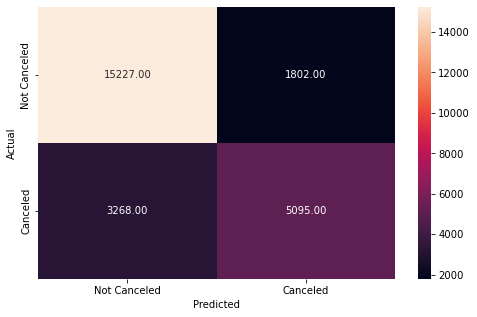

In [81]:
# Checking the performance on the training data
y_pred_train = log_reg.predict(X_train)

metrics_score(y_train, y_pred_train)

**Reading confusion matrix (clockwise):**

- **True Positive**: Predicting the customer will not cancel the booking and the customer does not cancel the booking.
- **False Negative**: Predicting the customer will cancel the booking but the customer does not cancel the booking.
- **True Negative**: Predicting the customer will cancel the booking and the customer cancels the booking.
- **False Positive**: Predicting the customer will not cancel the booking but the customer cancels the booking.

**Observations:

• The reported average includes the macro average which averages the unweighted mean per label, and the weighted average which averages the support-weighted mean per label.

• In classification, the class of interest is considered the positive class. Here, the class of interest is 1, i.e., identifying the customers who are projected to make booking cancellations.


• The model gives an accuracy of about 80% on the training dataset. However, the recall for this model is quite low, only around 60% for class 1 on the training data, which implies this model will not perform well in differentiating out the customers who have a high chance of booking cancellations. Hence, this model will not help in reducing the cancellation rate.

• The model gives a decent average recall of approximately 0.75. A recall of 0.75 suggests that there is a 25% chance that the model will predict that the booking be canceled even if it is not. For such case, hotel administration is not providing satisfactory customer services assuming that the reservation was indeed cancelled.

• As we can see from the Confusion Matrix, this model is not good at identifying customers who are projected to make cancellations.

**Precision-Recall Curve for Logistic Regression**

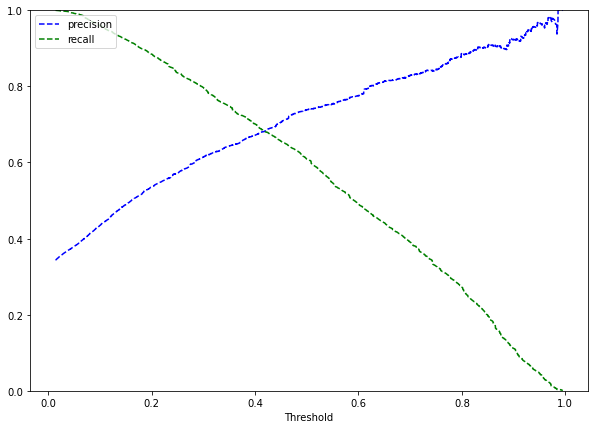

In [82]:
# predict_proba gives the probability of each observation belonging to each class

y_scores = log_reg.predict_proba(X_train) 

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

# Plotting values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')

plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observations:**

- We can see that **the precision and the recall are balanced for the threshold of about 0.4.**
- Let's try to calculate the exact threshold where precision and recall are equal.

In [83]:
# Calculating the exact threshold where precision and recall are equal
for i in np.arange(len(thresholds)):
    if precisions[i] == recalls[i]:
        print(thresholds[i])

0.41785529601946925


- The threshold of 0.42 would give a balanced precision and recall.

### **Question 8: Compare the performance of the model on the training set after changing the threshold and check the performance on the testing set  (2 Marks)**

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     17029
           1       0.68      0.68      0.68      8363

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



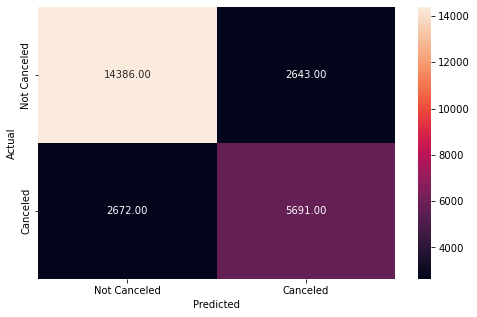

In [84]:
optimal_threshold1 = 0.42

metrics_score(y_train, y_scores[:, 1] > optimal_threshold1)

**Observation:

• The precision has dropped but the recall for class 1 has increased to 0.68; the class and metric of interest here.

• The model can better predict the customers who projected to cancel their bookings using an optimal threshold (value = 0.42), and would hence be a more useful model than the previous iteration with the default threshold.

**Let's check the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7361
           1       0.68      0.68      0.68      3522

    accuracy                           0.79     10883
   macro avg       0.77      0.77      0.77     10883
weighted avg       0.79      0.79      0.79     10883



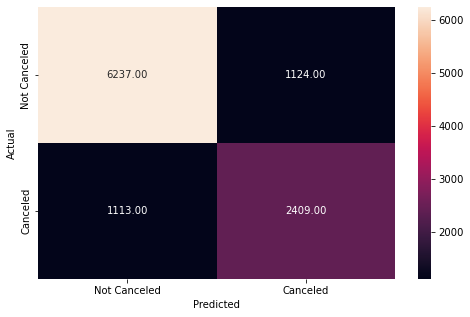

In [85]:
# Checking performance on the testing data
y_pred_test = log_reg.predict_proba(X_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

**Observations:

• The model is giving a similar performance on the test and the train data, meaning the model has generalized well.

• The average recall and the precision for the model are good, but let's see if we can get a better performance using other algorithms.

### **K-Nearest Neighbors (K-NN)**

- K-NN is a distance-based algorithm and all distance-based algorithms are affected by the scale of the data.
- We will scale the attributes (DataFrame X defined above) before building the K-NN model.
- Then, we need to identify the value of K to be used in K-NN. We will use **GridSearchCV** to find the optimal value of K along with other hyperparameters.

In [86]:
# Scaling the data
scaler = StandardScaler()

# fit_transform the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# Transform the testing data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) 

### **Using GridSearchCV for find the value of K and other hyperparameters**

**Points to note:**

* Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation.
* **Grid search** is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* Grid search is an exhaustive search of values that tries many iterations to compute the optimum values of hyperparameters. So, **it might take up to 30 minutes for the code to run depending on the number of values and hyperparameters passed.**  
* The hyperparameters that we are tuning are:

    - **n_neighbors**: Number of neighbors to use.

    - **weights={'uniform', 'distance'}**
        - uniform : uniform weights. All points in each neighborhood are weighted equally.
        - distance : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors that are further away.

    - **p**: When p = 1, this is equivalent to using Manhattan_distance (L1), and Euclidean_distance (L2) is used for p = 2.

In [87]:
knn = KNeighborsClassifier()

params_knn = {'n_neighbors':np.arange(2, 20, 2), 'weights':['uniform','distance'], 'p':[1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'f1', cv = 10, n_jobs = -1)

model_knn = grid_knn.fit(X_train_scaled,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KNeighborsClassifier(n_neighbors=14, p=1, weights='distance')


### **Question 9:**

- **Fit the KNN model on the scaled training data using the optimal values of hyperparameters obtained from GridSearchCV (1 mark)**
- **Check the performance of the model on the scaled training and testing sets (2 Marks)**
- **Compare the performance and write your observations (1 Marks)**

In [88]:
# Fit the best estimator on the training data
knn_estimator.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=14, p=1, weights='distance')

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       1.00      0.99      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



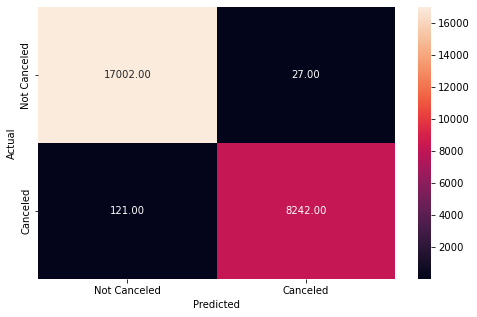

In [89]:
# Make predictions on the scaled training data and check the performance (using metrics_score function)

y_pred_train = knn_estimator.predict(X_train_scaled) 

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7361
           1       0.82      0.78      0.80      3522

    accuracy                           0.87     10883
   macro avg       0.86      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



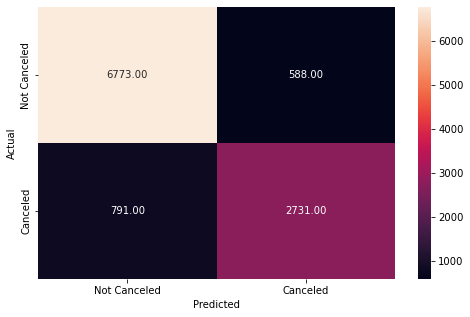

In [90]:
# Make predictions on the scaled testing data and check the performance (using metrics_score function)
y_pred_test = knn_estimator.predict(X_test_scaled) 

metrics_score(y_test, y_pred_test)

**Observations:

• This model seems to be trending overfitting, but the results have significantly improved compared to previous models.

• Both train and test recall for class 1 and precision have significantly increased by tuning the K-NN classifier.

• This appears to be a high-performing model that the hotel management can use to control the booking cancellation rate. There is about a 78% chance that the model will predict customers who are likely to cancel their reservations, and the management can take an informed decision.

### **Question 10: Write the conclusion on the key factors that are driving the cancellations and write your recommendations to the business on how they can minimize the number of cancellations. (5 Marks)**

### **Conclusion:**

We utilized data preprocessing techniques and built classification models to predict hotel booking cancellations for unseen data. After exploring the data, we carried out a model building approach with the following steps:

1.	Prepare the data for modeling

2.	Split the data into train and test data sets

3.	Build the model on the train data

4.	Tune the model as needed

5.	Test the information on the test data set

After trying multiple models, we have identified key factors involved with high booking cancellations in INN Hotels Group. The final model, a hyperparameter-tuned K-NN classifier, is overfitting on the training dataset but gives the highest recall on the training and the testing datasets. It may be possible to further try and tune the model, and the hotel management can use this model to predict whether the customers will cancel their bookings or not.

### **Recommendations:**

• The online market segment type, lead time, and average price per room are critical features in predicting hotel booking cancellations. Therefore, INN Hotel Group should create real-time online campaigns to improve customer retention. This addresses guests canceling their reservations when they find better deals on the Internet.

• We have seen the busiest period for INN Hotels Group, August to October. The management should ensure there won't be double-booking during this time to avoid angry customers resulting in cancellations.

• The number of nights booked and guests who did not select any meal plan impact the customers' cancellation record. The management might need to provide complimentary meal vouchers to customers who secured more than two nights, which is 31% of the hotel's patrons.

• Couples (or 2 adults) are the most popular guest profile. The management can leverage this satisfied group to meet/exceed their expectations continuously. This could be a powerful means of reducing the cancellation rate and increasing the customer base through word of mouth. 

• The management could come up with deals during off-peak periods to utilize available rooms. In addition, to avoid cancellation, offer to reserve them during non-demanding periods. This will drive refund policy and improve repeat customers. 